In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.data_processing import load_data

DATA_PATH = '../data/raw/aug_train.csv'
data = load_data(DATA_PATH)

Data loaded successfully. 


In [2]:
data[:5]

array([( 8949, 'city_103', 0.92 , 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', 36, 1.),
       (29725, 'city_40', 0.776, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', 47, 0.),
       (11561, 'city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', 83, 0.),
       (33241, 'city_115', 0.789, '', 'No relevent experience', '', 'Graduate', 'Business Degree', '<1', '', 'Pvt Ltd', 'never', 52, 1.),
       (  666, 'city_162', 0.767, 'Male', 'Has relevent experience', 'no_enrollment', 'Masters', 'STEM', '>20', '50-99', 'Funded Startup', '4',  8, 0.)],
      dtype=[('enrollee_id', '<i4'), ('city', '<U8'), ('city_development_index', '<f8'), ('gender', '<U6'), ('relevent_experience', '<U23'), ('enrolled_university', '<U16'), ('education_level', '<U14'), ('major_discipline', '<U15'), ('experience', '<U3'), ('company_size', '<U9'), ('company_typ

In [3]:
num_rows = data.shape[0]
num_cols = len(data.dtype.names)

print(f"Dataset dimensions: {num_rows} rows, {num_cols} columns.")

Dataset dimensions: 19158 rows, 14 columns.


In [4]:
data.dtype.names

('enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target')

In [5]:
max_len = len(max(data.dtype.names, key=len))

print("Data types per column:")
print("-" * (max_len + 25))

for name in data.dtype.names:
    print(f"- {name:<{max_len}} : {data.dtype[name]}")

Data types per column:
-----------------------------------------------
- enrollee_id            : int32
- city                   : <U8
- city_development_index : float64
- gender                 : <U6
- relevent_experience    : <U23
- enrolled_university    : <U16
- education_level        : <U14
- major_discipline       : <U15
- experience             : <U3
- company_size           : <U9
- company_type           : <U19
- last_new_job           : <U5
- training_hours         : int32
- target                 : float64


In [6]:
from src.data_processing import count_duplicates

num_duplicates = count_duplicates(data)

print(f"Original number of rows: {len(data)}")
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates == 0:
    print("Conclusion: Dataset is clean, there are no exact duplicate rows.")
else:
    print(f"Warning: Found {num_duplicates} duplicate rows. These should be removed during Preprocessing.")

Original number of rows: 19158
Number of duplicate rows: 0
Conclusion: Dataset is clean, there are no exact duplicate rows.


In [7]:
from src.data_processing import get_unique_stats

unique_stats = get_unique_stats(data)

print(f"{'Column Name':<25} | {'Unique Count':<15} | {'Examples (First 3 Valid)'}")
print("-" * 100)

for stat in unique_stats:
    print(f"{stat['column']:<25} | {stat['count']:<15} | {stat['examples']}")

Column Name               | Unique Count    | Examples (First 3 Valid)
----------------------------------------------------------------------------------------------------
enrollee_id               | 19158           | [1 2 4]
city                      | 123             | ['city_1' 'city_10' 'city_100']
city_development_index    | 93              | [0.448 0.479 0.487]
gender                    | 3               | ['Female' 'Male' 'Other']
relevent_experience       | 2               | ['Has relevent experience' 'No relevent experience']
enrolled_university       | 3               | ['Full time course' 'Part time course' 'no_enrollment']
education_level           | 5               | ['Graduate' 'High School' 'Masters']
major_discipline          | 6               | ['Arts' 'Business Degree' 'Humanities']
experience                | 22              | ['1' '10' '11']
company_size              | 8               | ['10/49' '100-500' '1000-4999']
company_type              | 6               | ['

Missing Values Statistics:
------------------------------------------------------------
Column Name               | Missing Count   | Percentage %
------------------------------------------------------------
company_type              | 6140            | 32.05%
company_size              | 5938            | 30.99%
gender                    | 4508            | 23.53%
major_discipline          | 2813            | 14.68%
education_level           | 460             | 2.40%
last_new_job              | 423             | 2.21%
enrolled_university       | 386             | 2.01%
experience                | 65              | 0.34%
enrollee_id               | 0               | 0.00%
city                      | 0               | 0.00%
city_development_index    | 0               | 0.00%
relevent_experience       | 0               | 0.00%
training_hours            | 0               | 0.00%
target                    | 0               | 0.00%


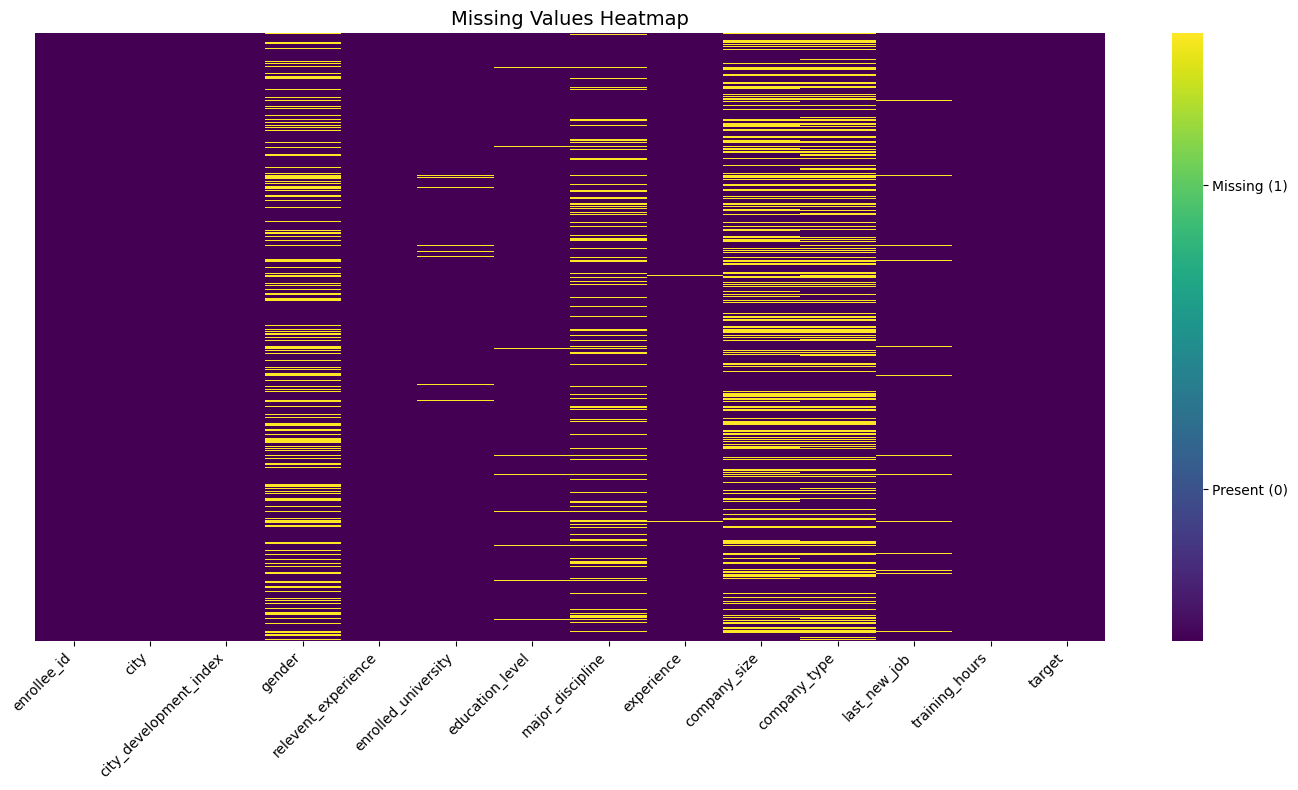

In [8]:
from src.data_processing import get_missing_stats, get_missing_matrix
from src.visualization import plot_missing_heatmap

missing_stats = get_missing_stats(data)

print("Missing Values Statistics:")
print("-" * 60)
print(f"{'Column Name':<25} | {'Missing Count':<15} | {'Percentage %':<10}")
print("-" * 60)
for item in missing_stats:
    print(f"{item['column']:<25} | {item['count']:<15} | {item['percent']:.2f}%")

matrix, features = get_missing_matrix(data)

plot_missing_heatmap(matrix, features)


###  Mini-conclusion: Missing Values Analysis

> **Observation:**
> * **High Missing Rate & Correlation:** The columns `company_type` (32.05%) and `company_size` (30.99%) exhibit the highest missing rates. The heatmap reveals a strong **overlap** between these two features (yellow lines often appear together). This suggests a structural pattern: these candidates are likely currently unemployed, freelancers, or working in unlisted sectors.
> * **Significant Demographic Gaps:** `gender` (~23.5%) and `major_discipline` (~14.7%) have substantial missing data. This might be due to privacy preferences or non-degree education levels.
> * **Data Integrity:** Fortunately, the `target` column and key numerical features (`city_development_index`, `training_hours`) have **0% missing values**.
> * **Action Strategy:** Dropping rows with missing values would result in losing ~30% of the dataset, which is unacceptable. Therefore, we will impute high-missing categorical columns with a new label **'Unknown'** to preserve this information, while low-missing columns (<3%) can be imputed with the **Mode**.

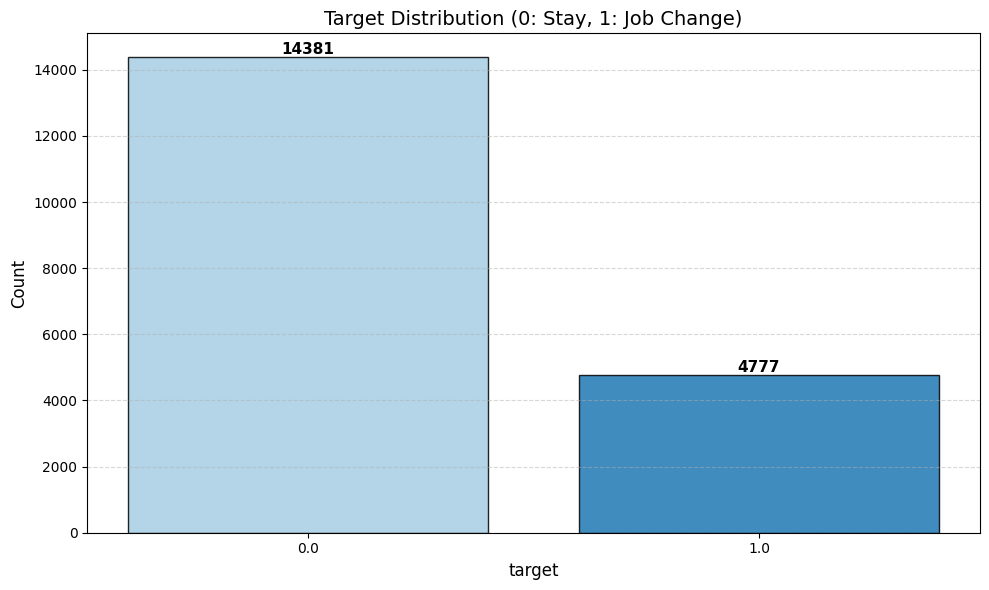

In [9]:
from src.visualization import plot_categorical_count

plot_categorical_count(data, 'target', title='Target Distribution (0: Stay, 1: Job Change)')

###  Mini-conclusion: Target Distribution

> **Observation:**
> * **Class Imbalance:** The dataset is clearly imbalanced. The majority class is **0 (Stay)**, which significantly outnumbers the minority class **1 (Job Change)**.
> * **Ratio:** The ratio between "Stay" and "Change" is roughly **3:1** (approx. 75% vs 25%).

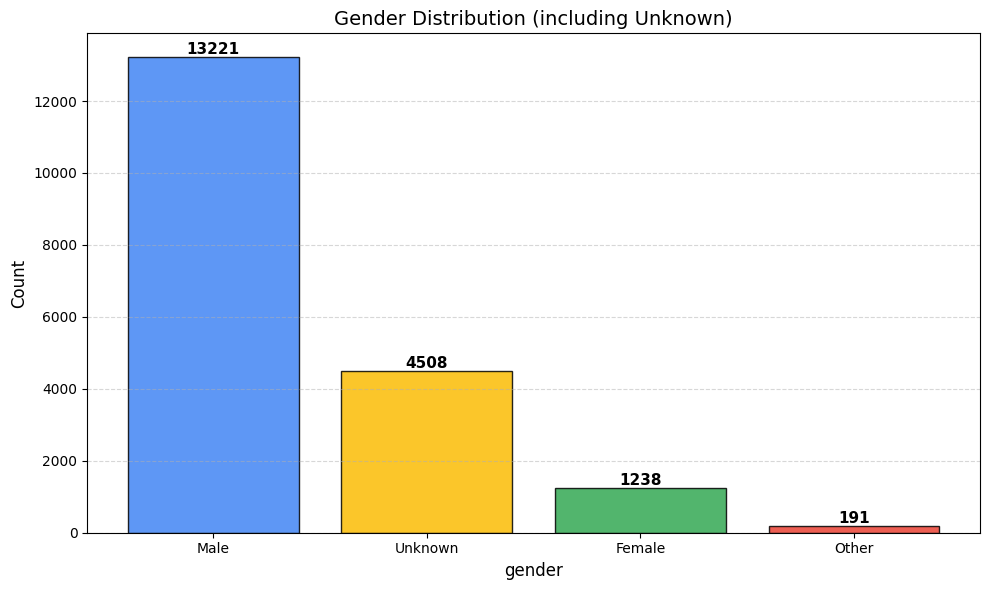

In [10]:
from src.visualization import plot_categorical_count

plot_categorical_count(data, 'gender', title='Gender Distribution (including Unknown)')

###  Mini-conclusion: Gender Distribution

> **Observation:**
> * **Male Dominance:** The dataset is overwhelmingly male-dominated, with **Males (~13,221)** accounting for the vast majority of candidates.
> * **High Missingness (Unknown):** The **'Unknown'** category (originally missing values) represents the second-largest group (**~4,508**), which is nearly **4 times larger** than the Female group (~1,238).
> * **Imbalance:** This severe class imbalance indicates that gender might not be a reliable predictor unless handled carefully, as the model might become biased towards the majority class (Male).

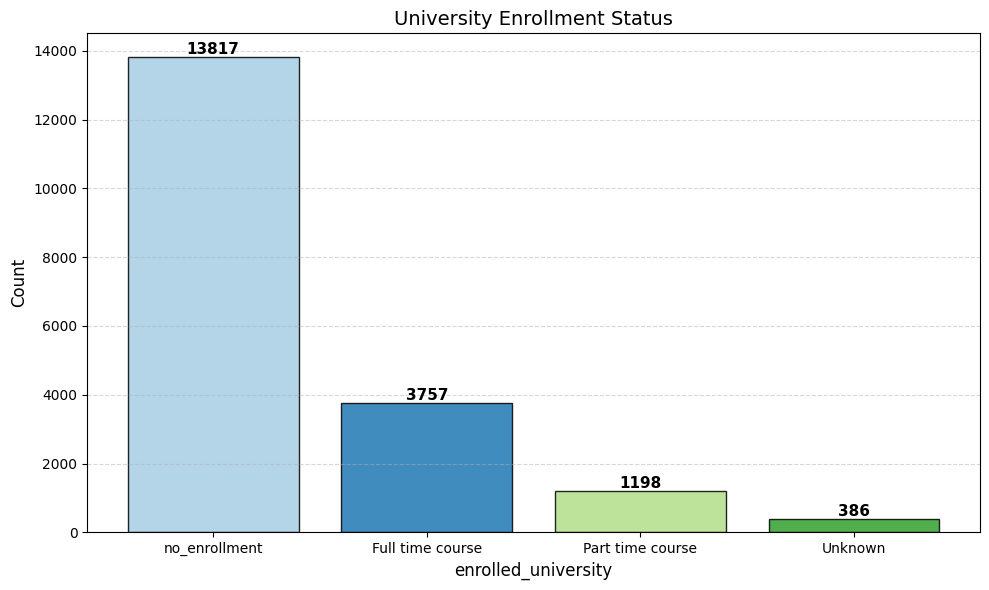

In [11]:
from src.visualization import plot_categorical_count

plot_categorical_count(data, 'enrolled_university', title='University Enrollment Status')

###  Mini-conclusion: University Enrollment

> **Observation:**
> * **Dominant Group (No Enrollment):** The vast majority of candidates (**13,817**) are not currently enrolled in any university course. This strongly suggests that the dataset primarily consists of **working professionals** rather than current students.
> * **Active Learners:** A notable segment consists of candidates pursuing education, with **Full time course (3,757)** being more common than **Part time course (1,198)**.
> * **High Data Quality:** The **'Unknown'** category (missing values) is very small (**386**, ~2%), indicating that most candidates provided clear information regarding their enrollment status.

Statistics for education_level:
--------------------------------------------------------------------------------
Category             | Not Looking (0) | Looking (1)     | % Looking 
--------------------------------------------------------------------------------
Graduate             | 8,353           | 3,245           | 28.0%
Masters              | 3,426           | 935             | 21.4%
High School          | 1,623           | 394             | 19.5%
Unknown              | 356             | 104             | 22.6%
Phd                  | 356             | 58              | 14.0%
Primary School       | 267             | 41              | 13.3%
--------------------------------------------------------------------------------


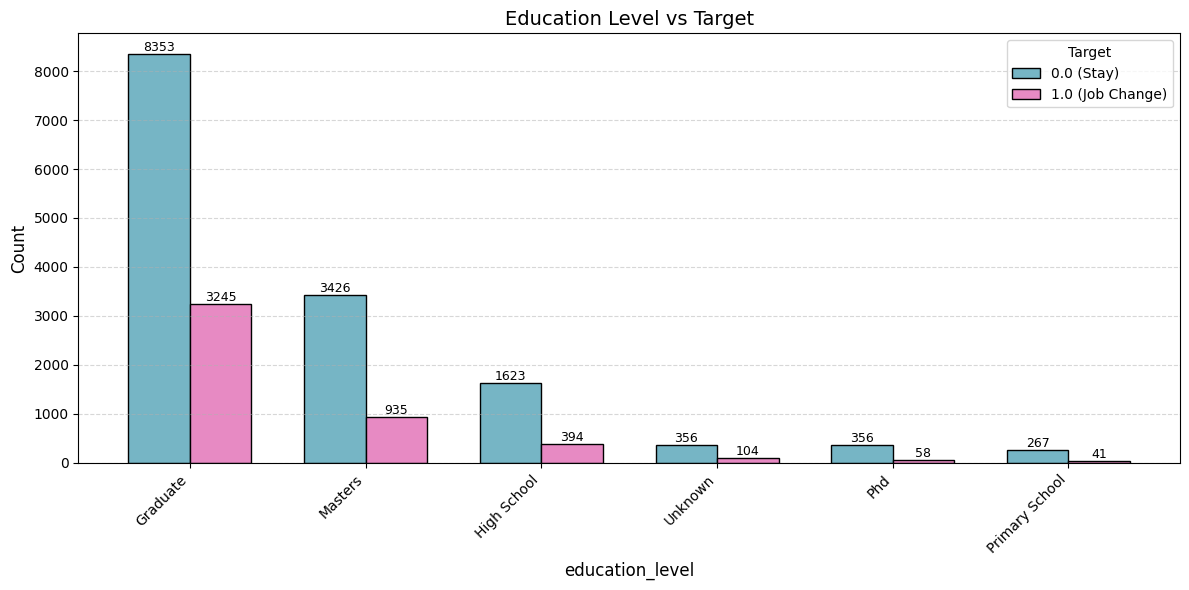

In [12]:
from src.data_processing import get_category_stats
from src.visualization import plot_category_vs_target

col_name = 'education_level'
stats = get_category_stats(data, col_name)

print(f"Statistics for {col_name}:")
print("-" * 80)

print(f"{'Category':<20} | {'Not Looking (0)':<15} | {'Looking (1)':<15} | {'% Looking':<10}")
print("-" * 80)

for s in stats:
    
    print(f"{s['label']:<20} | {s['0']:<15,} | {s['1']:<15,} | {s['pct']:.1f}%")
print("-" * 80)


plot_category_vs_target(stats, col_name, title='Education Level vs Target')

###  Mini-conclusion: Education Level vs Target

> **Observation:**
> * **Graduate Turnover:** Candidates with a **Graduate** degree form the largest group and exhibit the highest turnover intention (**28.0%** looking for a job change). This suggests that fresh graduates or those with a basic degree are more actively seeking new opportunities.
> * **Higher Education Stability:** As education level increases, the turnover rate tends to decrease. Candidates with **Masters (21.4%)** and especially **PhD (14.0%)** show significantly lower intent to change jobs compared to Graduates.
> * **Lower Education Levels:** Interestingly, candidates with **Primary School** education have the lowest turnover rate (**13.3%**), possibly indicating job stability or fewer opportunities to switch.
> * **Insight:** Academic qualification appears to be an inverse indicator of turnover risk: higher (PhD) or very basic (Primary) education levels correlate with higher retention, whereas Graduates are the most volatile group.

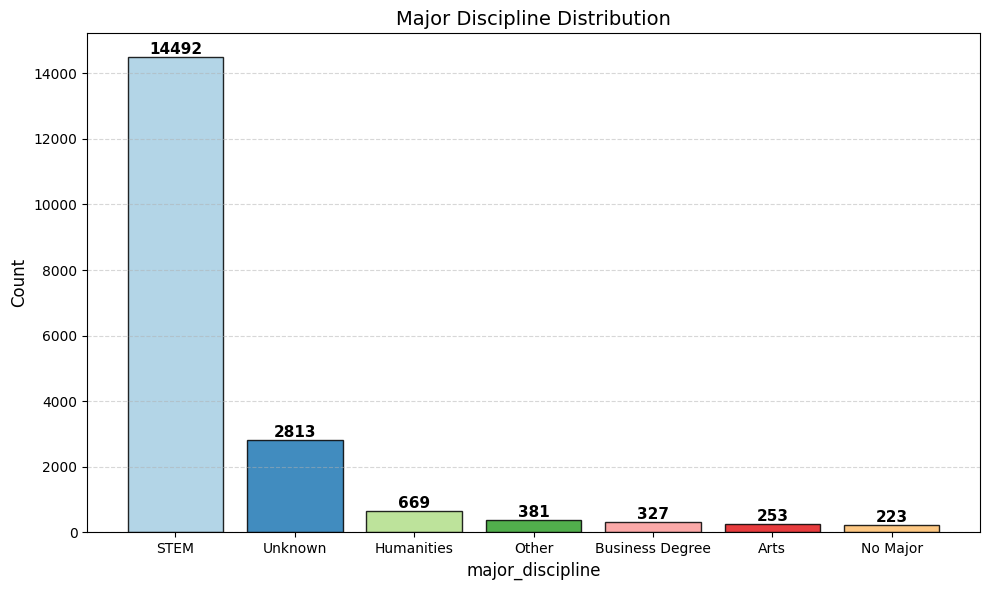

In [13]:
from src.visualization import plot_categorical_count

plot_categorical_count(data, 'major_discipline', title='Major Discipline Distribution')

###  Mini-conclusion: Major Discipline

> **Observation:**
> * **STEM Dominance:** The vast majority of candidates (**14,492**) come from a **STEM** (Science, Technology, Engineering, and Mathematics) background. This aligns with the expectation for a Data Science-related dataset.
> * **Significant Missing Data:** The **'Unknown'** category (missing values) is substantial, with **2,813** entries. This group is larger than all other non-STEM disciplines combined.
> * **Minor Disciplines:** Other fields such as Humanities, Business Degree, Arts, and 'No Major' represent a very small fraction of the total population.

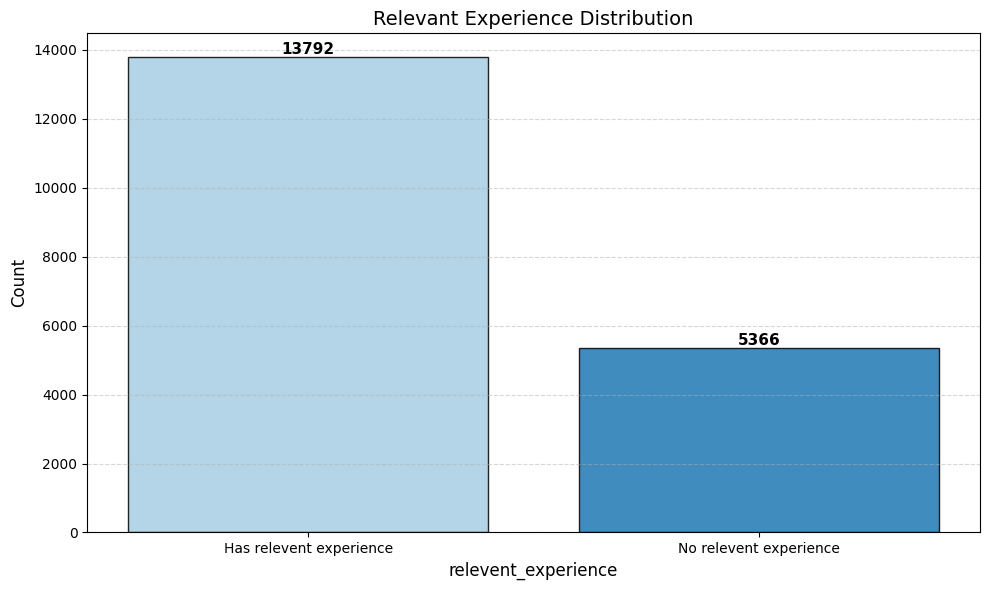

In [14]:
from src.visualization import plot_categorical_count

plot_categorical_count(data, 'relevent_experience', title='Relevant Experience Distribution')

###  Mini-conclusion: Relevant Experience

> **Observation:**
> * **Experienced Majority:** The group **"Has relevent experience"** is the dominant category with **13,792** candidates (~72%), while those with **"No relevent experience"** account for **5,366** candidates (~28%).
> * **Recruitment Context:** This distribution aligns with the nature of Data Science roles, which often attract professionals with some prior industry exposure.
> * **Data Quality:** This column has **0 missing values**.
> * **Preprocessing:** Since this is a binary feature, we can efficiently encode it as **1 (Has)** and **0 (No)** in the next step.

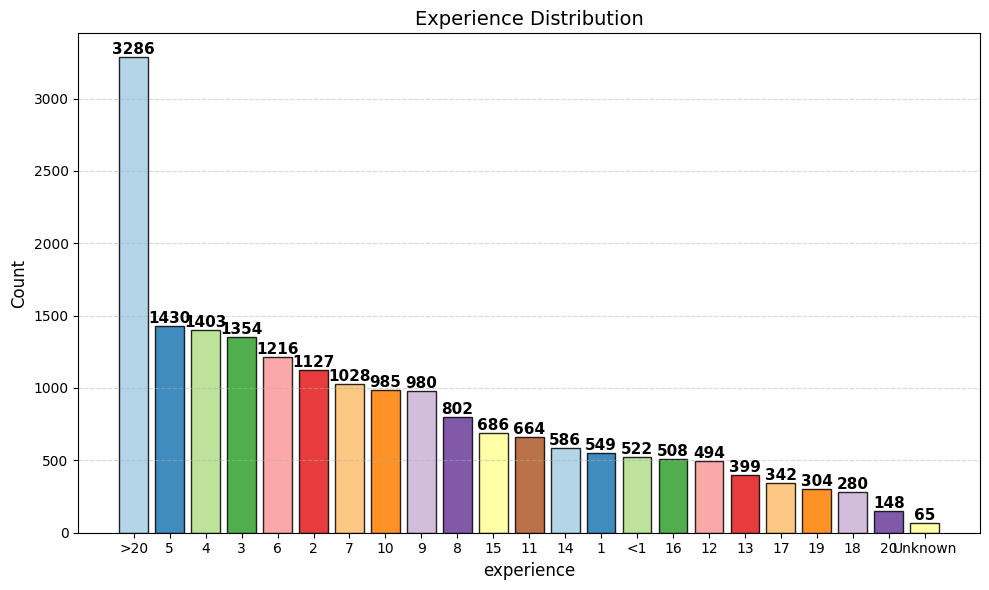

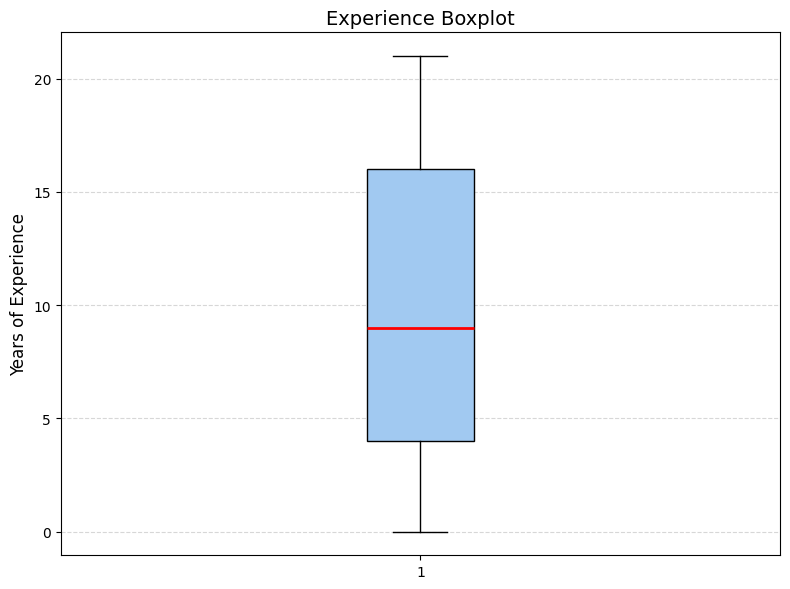

In [15]:
from src.visualization import plot_categorical_count
from src.visualization import plot_experience_boxplot

plot_categorical_count(data, 'experience', title='Experience Distribution')
plot_experience_boxplot(data, 'experience', title='Experience Boxplot')

###  Mini-conclusion: Experience

> **Observation:**
> * **Seniority Dominance:** The category **'>20'** (More than 20 years) is by far the largest group with **3,286** candidates. This confirms that the dataset is heavily weighted towards highly experienced professionals.
> * **Experience Spread:** There is a gradual decline in frequency from 5 years down to 1 year, showing a healthy representation of mid-level and junior candidates.
> * **Data Quality:** The **'Unknown'** category (missing values) is negligible, with only **65** entries (~0.3%), indicating excellent data completeness for this feature.
> * **Preprocessing Note:** The values are currently mixed strings (`>20`, `<1`, `1`, `2`...). In the *Preprocessing* phase, we must convert these into numerical format (e.g., map `>20` to `21`, `<1` to `0`) to make them usable for machine learning models.

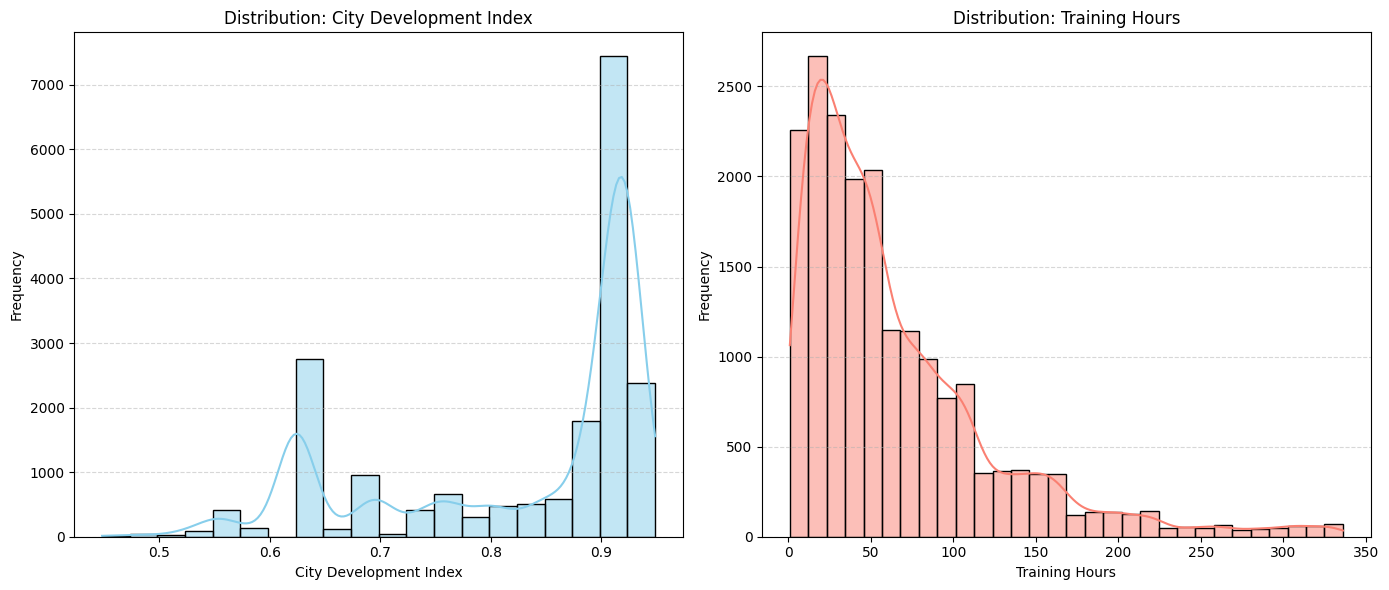

In [16]:
from src.visualization import plot_key_distributions
 
plot_key_distributions(data)

###  Mini-conclusion: Feature Distributions

> **Observation:**
> * **City Development Index (Left-Skewed):** The distribution is heavily skewed to the left, with a high concentration of values between 0.9 and 1.0. This indicates that the majority of data scientists in this dataset originate from **highly developed cities**.
> * **Training Hours (Right-Skewed):** The distribution shows a classic "long-tail" pattern (right-skewed). Most candidates spend relatively few hours training (< 50 hours), but there is a significant minority of "outliers" who invest 200-300+ hours.
> * **Modeling Implication:** Since these features have different scales and non-normal distributions, we will need to apply **Feature Scaling** (e.g., Min-Max Scaling or Log Transformation) in the *Preprocessing* step to ensure model stability.

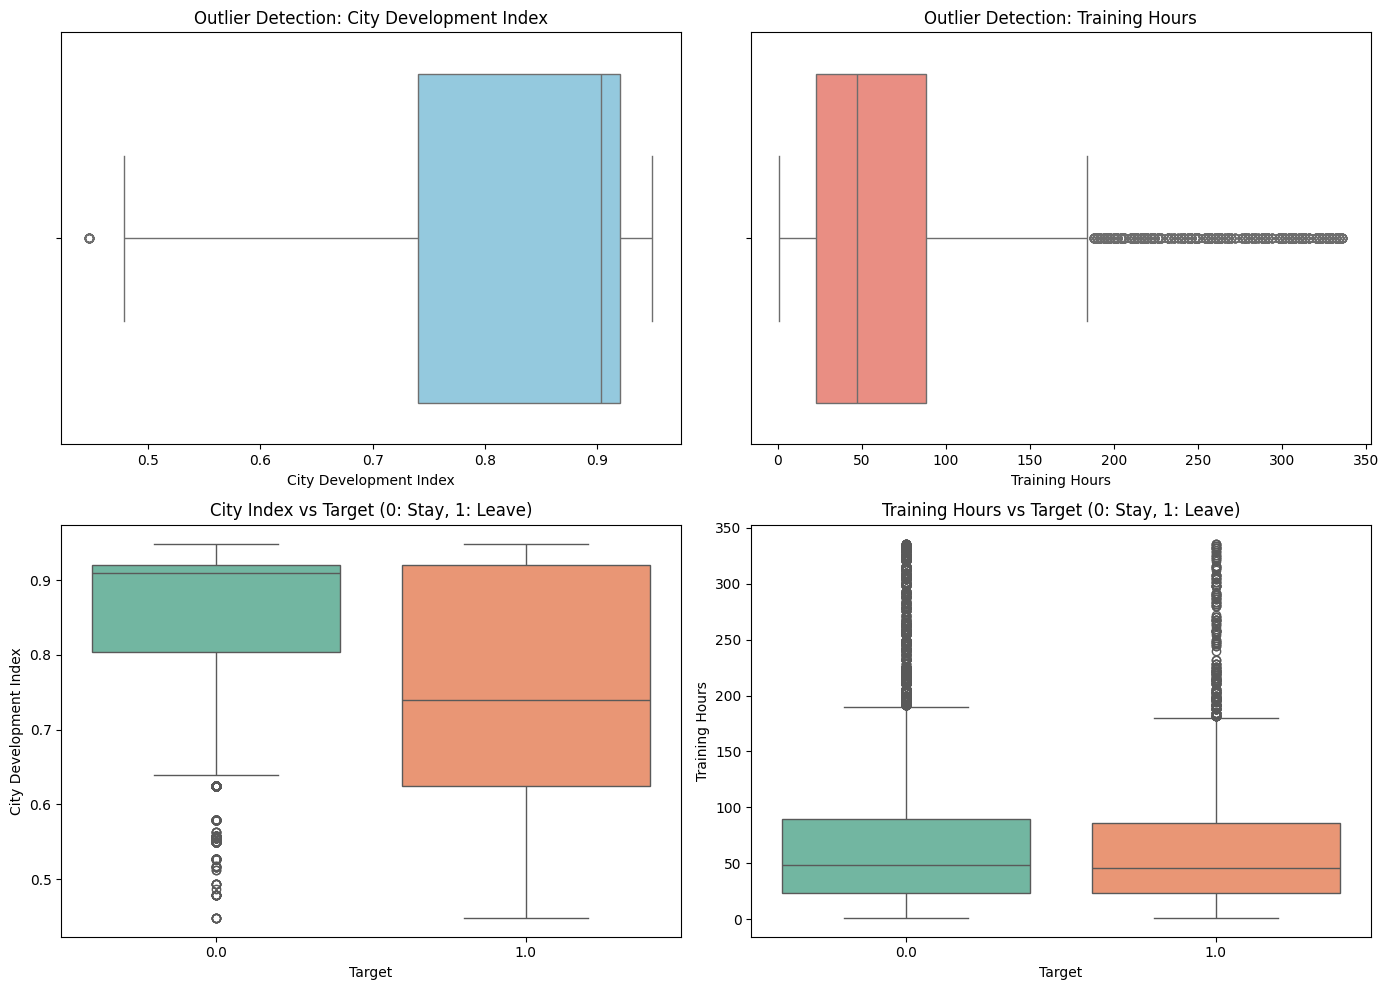

In [17]:
from src.visualization import plot_key_boxplots
plot_key_boxplots(data)

###  Mini-conclusion: Boxplot Analysis

> **Observation:**
> * **1. Outlier Detection (Top Row):**
>     * **City Development Index:** The data is concentrated at the high end (Median ~0.9). Significant **outliers appear on the lower end (< 0.6)**, indicating that candidates from under-developed cities are rare cases in this dataset.
>     * **Training Hours:** The data is concentrated at the low end (Median ~50). There is a massive cluster of **outliers on the higher end (> 180 hours)**, confirming the heavy right-skewness.
>
> * **2. Relationship with Target (Bottom Row):**
>     * **City Index vs Target:** There is a **strong correlation**. The "Leave" group (1) has a significantly **lower median (~0.74)** and a wider spread compared to the "Stay" group (0) (Median ~0.92). -> **Key Insight:** Candidates from developing cities are much more likely to look for new jobs.
>     * **Training Hours vs Target:** The boxplots for "Stay" (0) and "Leave" (1) are **almost identical** in terms of median and IQR. -> **Key Insight:** Training duration does not appear to be a distinguishing factor for job change.

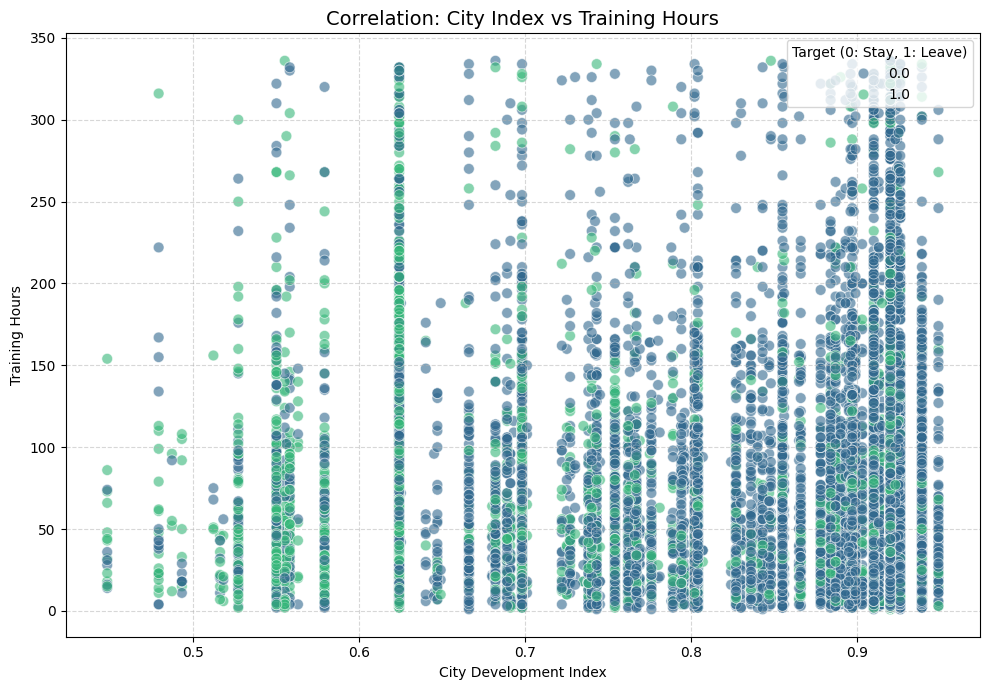

In [18]:
from src.visualization import plot_key_scatter

plot_key_scatter(data)

###  Mini-conclusion: Correlation Analysis

> **Observation:**
> * **Weak Correlation:** The scatter plot shows a highly dispersed pattern with vertical striations (due to discrete values of City Index). There is **no clear linear relationship** between `city_development_index` and `training_hours`. This implies that a candidate's training duration is independent of where they live.
> * **Target Separation:**
>     * We can observe a higher density of **"Leave" candidates (Green/Light points)** on the **left side** (Lower City Index).
>     * However, along the Y-axis (Training Hours), both "Leave" and "Stay" groups are mixed throughout.
> * **Implication:** Since these two numerical features are not correlated, they provide distinct information to the model, which is beneficial for algorithms like Logistic Regression or Naive Bayes (which assume feature independence).

###  Key Insights & Observations

Based on the statistical analysis and visualizations performed above, we have derived the following critical insights:

#### 1. Structural Missing Data in Employment History
- **Observation:** The columns `company_type` (32.05%) and `company_size` (30.99%) exhibit the highest missing rates.
- **Analysis:** This pattern is likely **not random**. Candidates with missing company information might currently be unemployed, freelancers, or working in unlisted sectors.
- **Action:** Standard imputation (filling with Mode) is risky here as it would distort the data. We should introduce a new category labeled **'Unknown'** or **'Other'** to capture this specific group behavior.

#### 2. Demographic Information Gaps
- **Gender:** Approximately **23.5%** of gender data is missing. Since this is a significant portion, imputing with the most frequent value ('Male') could introduce heavy bias. Treating missing values as a separate category ('Unknown') is recommended to preserve data integrity.
- **Education & Discipline:** `major_discipline` has ~14.7% missing values. This likely correlates with candidates having an education level (e.g., High School) where a specific major is not applicable.

#### 3. Feature Distribution Characteristics
- **City Development Index:** The distribution is **left-skewed**, indicating that the majority of candidates come from well-developed cities (high index values).
- **Training Hours:** The distribution is **right-skewed**, showing that most candidates undergo short training durations, while a small "elite" group invests significantly more time.

#### 4. Data Quality for Modeling
- **Target Variable:** The `target` column has **0% missing values**. This is excellent for supervised learning, as we do not need to drop any rows due to missing labels.
- **Clean Features:** Important numerical features like `city_development_index` and `training_hours` are fully populated, ensuring a solid foundation for quantitative analysis.